In [205]:
import networkx as nx
import pandas
from hatchet import *
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.cm as cm
import mpld3
import numpy as np

In [206]:
#from actions.groupBy import groupBy
from state import State
from preprocess import PreProcess

In [207]:
%matplotlib inline

In [208]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

# Change the directory name according to your system

In [209]:
dirname = "/Users/jarus/ucd/Research/Visualisation/projects/CallFlow/.callflow"
# dirname = "/Users/padmanabanke1/CallFlow/.callflow"
# dirname = "/home/vidi/Work/llnl/CallFlow/.callflow"

# Load datasets.

In [210]:
def replace_str_with_Node(df, graph):
        mapper = {}
        def dfs_recurse(root):
            for node in root.children: 
                mapper[node.callpath[-1]] = Node(node.nid, node.callpath, None)
                dfs_recurse(node)
        for root in graph.roots:
            mapper[root.callpath[-1]] = Node(root.nid, root.callpath, None)
            dfs_recurse(root)
        df['node'] = df['node'].apply(lambda node: mapper[node] if node in mapper else '')
        return df

In [211]:
def read_gf(name):
    state = State()
    df_filepath = dirname + '/' + name +  '/filter_df.csv'
    entire_df_filepath = dirname + '/' + name + '/entire_df.csv'
    graph_filepath = dirname + '/' + name + '/filter_graph.json'
    entire_graph_filepath = dirname + '/' + name + '/entire_graph.json'   

    with open(graph_filepath, 'r') as graphFile:
        data = json.load(graphFile)

    state.gf = GraphFrame()
    state.gf.from_literal(data)

    with open(entire_graph_filepath, 'r') as entire_graphFile:
        entire_data = json.load(entire_graphFile)
            
    state.entire_gf = GraphFrame()
    state.entire_gf.from_literal(entire_data)

    state.df = pd.read_csv(df_filepath)
    state.entire_df = pd.read_csv(entire_df_filepath)

    state.graph = state.gf.graph
    state.entire_graph = state.entire_gf.graph

#     state.map = state.node_hash_mapper()

    # Print the module group by information. 
    # print(state.df.groupby(['module']).agg(['mean','count']))

    # replace df['node'] from str to the Node object.
    state.df = replace_str_with_Node(state.df, state.graph)
    state.entire_df = replace_str_with_Node(state.entire_df, state.entire_graph)

    return state

In [212]:
datasets = ["kripke-mvapich2", "kripke-openmpi", "kripke-impi"]
# datasets = ['calc-pi', 'calc-pi-half','calc-pi-random-1']
states = {}
for idx, dataset_name in enumerate(datasets):
    state = read_gf(dataset_name)
    states[dataset_name] = state
print(states)

{'kripke-mvapich2': <state.State object at 0x1a29180978>, 'kripke-openmpi': <state.State object at 0x1a3e115a90>, 'kripke-impi': <state.State object at 0x1a295d4240>}


# Mention the dataset.

In [196]:
dataset = 'kripke-mvapich2'

In [197]:
entire_df = states[dataset].entire_df
df = states[dataset].df

### Modules in the dataframe.

In [198]:
entire_df_modules = states[dataset].entire_df['module'].unique()
print("Modules in entire_df:", modules)
print('\n')
df_modules = states[dataset].df['module'].unique()
print("Modules in df:", df_modules)

Modules in entire_df: ['<unknown load module>' 'Unknown(NA)' 'libhpcrun.so.0.0.0'
 'libmonitor.so.0.0.0' 'kripke' 'libmpi.so.40.20.0'
 'libopen-rte.so.40.20.0' 'mca_ess_pmi.so' 'libopen-pal.so.40.20.0'
 'mca_pml_cm.so' 'mca_mtl_psm2.so' 'libpsm2.so.2.1' 'mca_coll_tuned.so'
 'ld-2.17.so' 'libstdc++.so.6.0.20' 'libc-2.17.so' 'libpthread-2.17.so'
 'libintlc.so.5']


Modules in df: ['<unknown load module>' 'Unknown(NA)' 'libmonitor.so.0.0.0' 'kripke'
 'libm-2.17.so' 'libc-2.17.so' 'libstdc++.so.6.0.20' 'libmpi.so.12.0.5'
 'libpsm2.so.2.1' 'libintlc.so.5' 'ld-2.17.so' 'libpthread-2.17.so']


### Number of functions inside each module

In [199]:
def number_of_functions(df, module):
    module_df = df.loc[df['module'] == module]
    number_of_functions_df = module_df.groupby(['name', 'nid'])
    print("Number of functions in {0}: {1} ".format(module, number_of_functions_df.ngroups))

In [200]:
print("Functions inside the entire_df \n")
for module in entire_df_modules:
    number_of_functions(df, module)

Functions inside the entire_df 

Number of functions in <unknown load module>: 2 
Number of functions in Unknown(NA): 1275 
Number of functions in libmonitor.so.0.0.0: 3 
Number of functions in kripke: 42 
Number of functions in libmpi.so.12.0.5: 167 
Number of functions in libpsm2.so.2.1: 604 
Number of functions in libstdc++.so.6.0.20: 50 
Number of functions in libc-2.17.so: 164 
Number of functions in libm-2.17.so: 1 
Number of functions in libpthread-2.17.so: 3 
Number of functions in ld-2.17.so: 10 
Number of functions in libintlc.so.5: 1 


In [201]:
print("Functions inside the df \n")
for module in df_modules:
    number_of_functions(df, module)

Functions inside the df 

Number of functions in <unknown load module>: 2 
Number of functions in Unknown(NA): 1275 
Number of functions in libmonitor.so.0.0.0: 3 
Number of functions in kripke: 42 
Number of functions in libm-2.17.so: 1 
Number of functions in libc-2.17.so: 164 
Number of functions in libstdc++.so.6.0.20: 50 
Number of functions in libmpi.so.12.0.5: 167 
Number of functions in libpsm2.so.2.1: 604 
Number of functions in libintlc.so.5: 1 
Number of functions in ld-2.17.so: 10 
Number of functions in libpthread-2.17.so: 3 


### Ranks in dataset

In [202]:
number_of_ranks = len(entire_df['rank'].unique())
print(number_of_ranks)

128


### Inclusive times of functions inside a module

In [203]:
def plot_metric(df, module, metric):
    module_df = df.loc[df['module'] == module]
    print('Module:', module)
    inclusive_entire_df = module_df.groupby(['name', 'nid'])[metric]
    number_of_functions = inclusive_entire_df.ngroups
    print("Number of functions inside:", number_of_functions)
    grid_length = math.floor(math.sqrt(number_of_functions))
    print(grid_length)
    if number_of_functions != 1:
        f, ax = plt.subplots(grid_length, grid_length,  sharey=True)
    idx = 0
    for name, group in inclusive_entire_df:
        div_idx = math.floor(idx / grid_length)
        mod_idx = math.floor(idx % grid_length)
        print(name)
        print(group)
        ax[div_idx, mod_idx].hist(group)
        ax[div_idx, mod_idx].set_title(name[0:4])
        idx += 1

Module: Unknown(NA)
Number of functions inside: 1275
35


KeyboardInterrupt: 

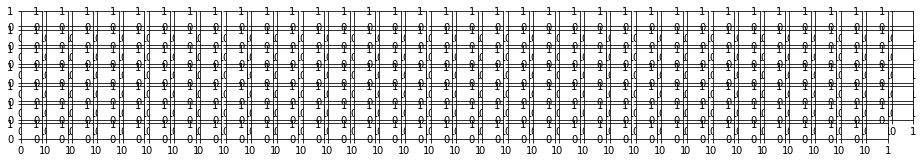

In [204]:
plot_metric(df, modules[1], 'time (inc)')